In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the CSV file
csv_path = '/global/D1/homes/vajira/data/SEARCH/deepfake_ecgs/filtered_all_normal_ECGs/filtered_all_normals_121977_ground_truth.csv'
df = pd.read_csv(csv_path)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]:,}")


Dataset shape: (121977, 788)
Number of rows: 121,977
Number of columns: 788


In [2]:
# Display basic information about the dataset
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn categories:")
print(f"  - Basic info: TestID, patid, dates, etc.")
print(f"  - ECG intervals: pr, qrs, qt, etc.")
print(f"  - Waveform features: P, Q, R, S, T waves across leads")
print(f"  - Binary flags: sl_* columns")
print(f"  - Labels: ecgcategory, numcodes")

print("\n" + "=" * 80)
print("FIRST FEW ROWS")
print("=" * 80)
df.head()


DATASET OVERVIEW

Shape: 121,977 rows × 788 columns

Column categories:
  - Basic info: TestID, patid, dates, etc.
  - ECG intervals: pr, qrs, qt, etc.
  - Waveform features: P, Q, R, S, T waves across leads
  - Binary flags: sl_* columns
  - Labels: ecgcategory, numcodes

FIRST FEW ROWS


,TestID,patid,AcquisitionDateTime_DT,AnalysisSoftwareVersion,ecgday,avgrrinterval,tonset,NumQRSComplexes,VentRate,AtrialRate,...,sl_1180,sl_1672,sl_1680,sl_1682,sl_1684,sl_1687,sl_1693,sl_1699,numcodes,ecgcategory
0,140000,0,NaN,NaN,NaN,1006.0,329.0,10.0,60,60,...,False,False,False,False,True,False,False,False,2,Normal ECG
1,140001,1,NaN,NaN,NaN,918.0,316.0,11.0,65,65,...,False,False,False,False,True,False,False,False,2,Normal ECG
2,212220,3,NaN,NaN,NaN,982.0,325.0,10.0,61,61,...,False,False,False,False,True,False,False,False,3,Normal ECG
3,223331,4,NaN,NaN,NaN,860.0,315.0,12.0,70,70,...,False,False,False,False,True,False,False,False,2,Normal ECG
4,234442,5,NaN,NaN,NaN,962.0,322.0,11.0,62,62,...,False,False,False,False,True,False,False,False,2,Normal ECG


In [3]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
missing_df = missing_df[missing_df['Missing Count'] > 0]

print(f"\nColumns with missing values: {len(missing_df)}")
if len(missing_df) > 0:
    print("\nTop 20 columns with missing values:")
    print(missing_df.head(20))
else:
    print("\nNo missing values found!")


MISSING VALUES ANALYSIS

Columns with missing values: 7

Top 20 columns with missing values:
                         Missing Count  Missing Percentage
ecgday                          121977          100.000000
AnalysisSoftwareVersion         121977          100.000000
AcquisitionDateTime_DT          121977          100.000000
poffset                             96            0.078703
ponset                              96            0.078703
paxis                               60            0.049190
pr                                   3            0.002459


ECG CATEGORY DISTRIBUTION

Category distribution:
ecgcategory
Normal ECG    121977
Name: count, dtype: int64

Total samples: 121,977


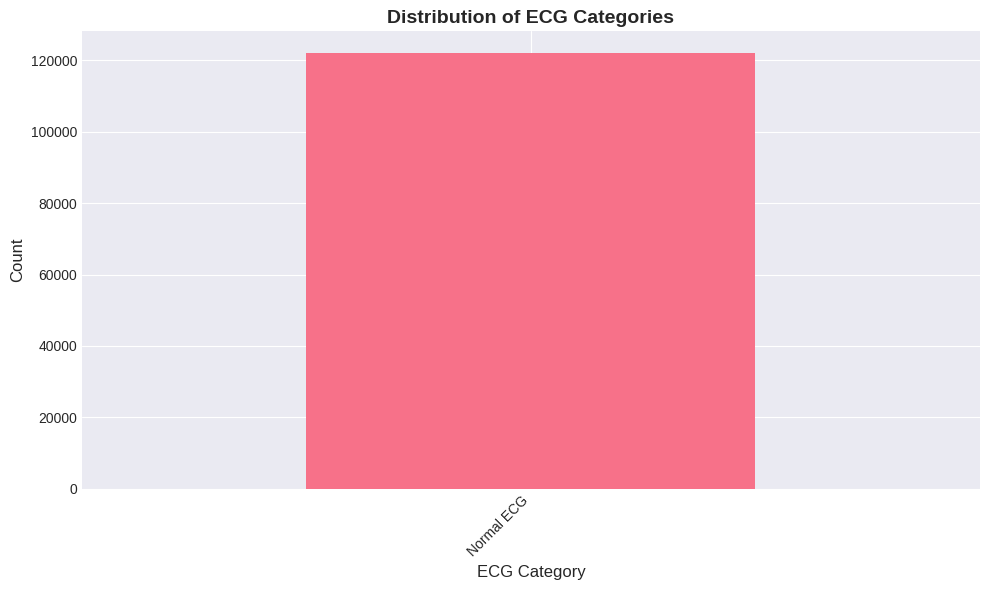

In [4]:
# Analyze ECG category distribution
print("=" * 80)
print("ECG CATEGORY DISTRIBUTION")
print("=" * 80)
if 'ecgcategory' in df.columns:
    category_counts = df['ecgcategory'].value_counts()
    print("\nCategory distribution:")
    print(category_counts)
    print(f"\nTotal samples: {len(df):,}")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')
    plt.title('Distribution of ECG Categories', fontsize=14, fontweight='bold')
    plt.xlabel('ECG Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


KEY ECG PARAMETERS STATISTICS

Descriptive statistics for key ECG parameters:
            VentRate     AtrialRate             pr            qrs  \
count  121977.000000  121977.000000  121974.000000  121977.000000   
mean       69.709855      69.727867     158.114123      92.052633   
std         7.546590       7.549659      16.848349       8.667925   
min        60.000000      60.000000     112.000000      60.000000   
25%        64.000000      64.000000     146.000000      86.000000   
50%        68.000000      68.000000     158.000000      92.000000   
75%        74.000000      74.000000     170.000000      98.000000   
max       100.000000     100.000000     208.000000     116.000000   

                  qt           qtcf  avgrrinterval  NumQRSComplexes  \
count  121977.000000  121977.000000  121977.000000    121977.000000   
mean      395.206949     414.145667     869.180419        11.493200   
std        20.480469      16.708287      86.812330         1.301346   
min       318.00

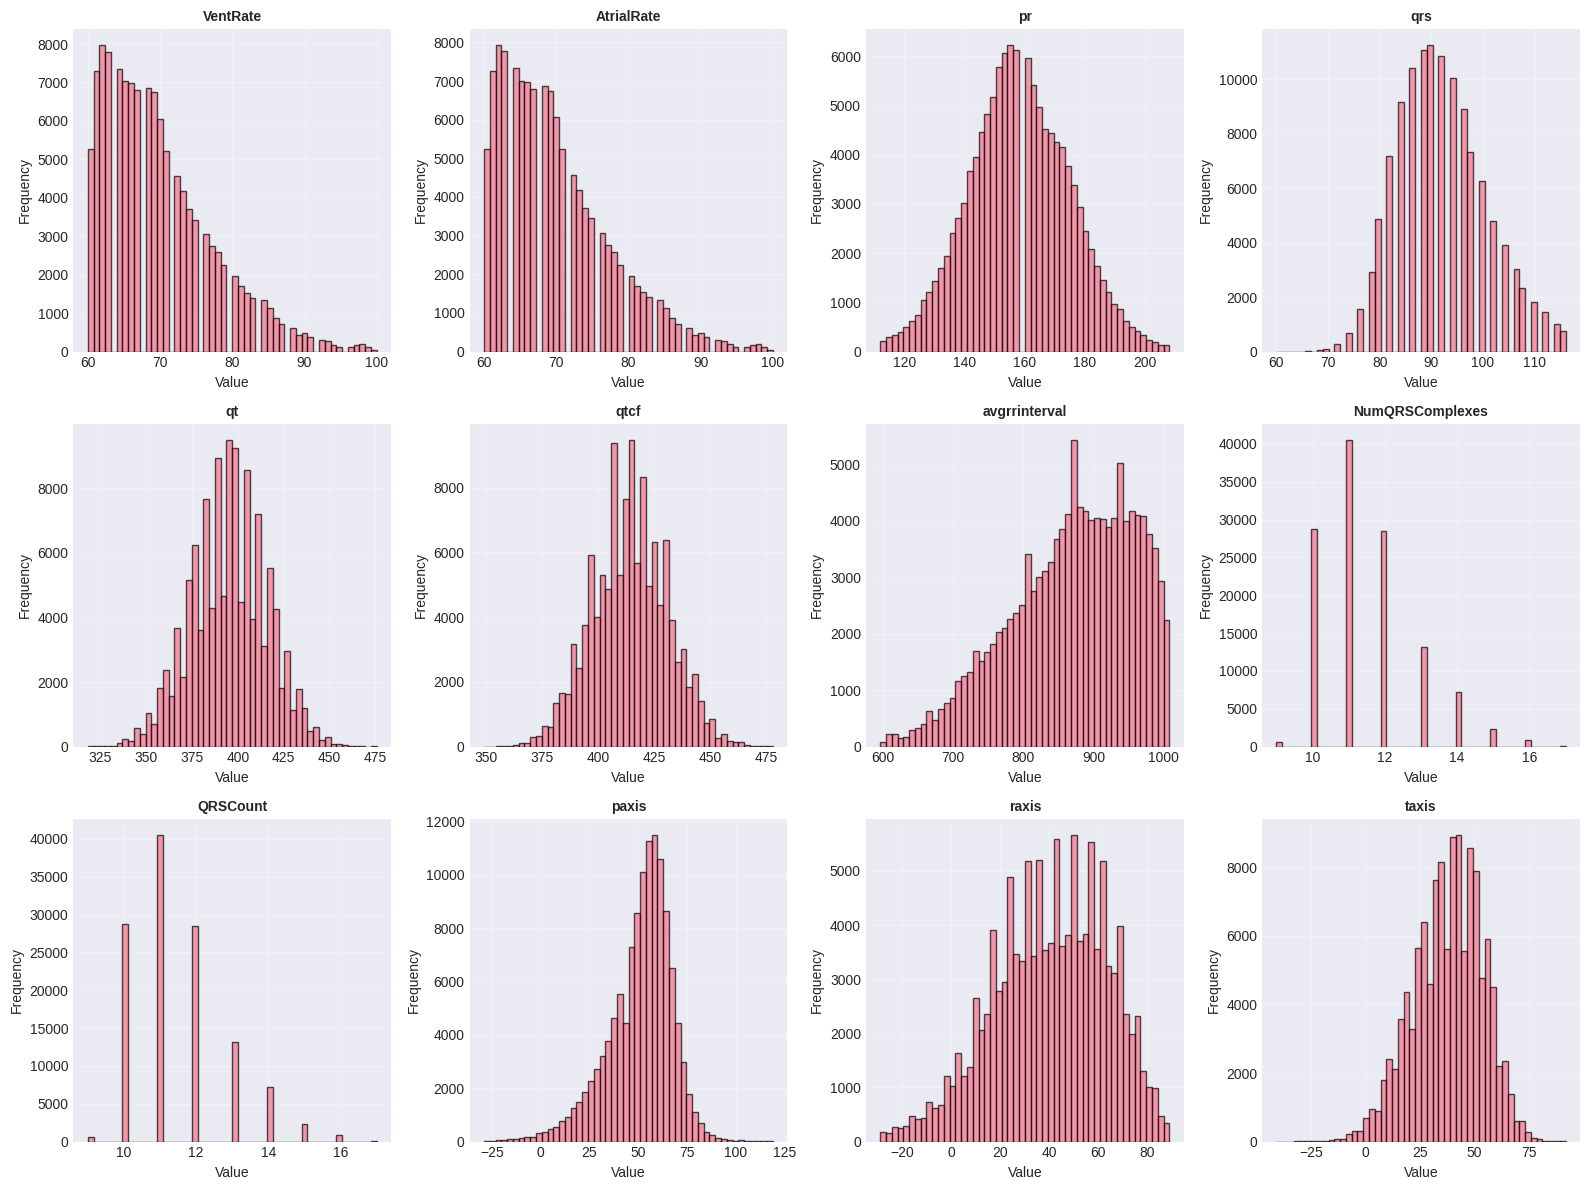

In [5]:
# Analyze key ECG parameters
print("=" * 80)
print("KEY ECG PARAMETERS STATISTICS")
print("=" * 80)

key_params = ['VentRate', 'AtrialRate', 'pr', 'qrs', 'qt', 'qtcf', 'avgrrinterval', 
              'NumQRSComplexes', 'QRSCount', 'paxis', 'raxis', 'taxis']

available_params = [p for p in key_params if p in df.columns]

if available_params:
    print("\nDescriptive statistics for key ECG parameters:")
    stats_df = df[available_params].describe()
    print(stats_df)
    
    # Visualization
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, param in enumerate(available_params[:12]):
        if i < len(axes):
            df[param].hist(bins=50, ax=axes[i], edgecolor='black', alpha=0.7)
            axes[i].set_title(f'{param}', fontsize=10, fontweight='bold')
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


R WAVE AMPLITUDES ACROSS LEADS

Found 12 R wave amplitude columns

Descriptive statistics:
        R_PeakAmpl_i  R_PeakAmpl_ii  R_PeakAmpl_v1  R_PeakAmpl_v2  \
count  121977.000000  121977.000000  121977.000000  121977.000000   
mean      678.873706     862.992031     183.288751     491.915828   
std       237.832782     273.523845      93.412581     258.780634   
min         9.000000       9.000000       0.000000      19.000000   
25%       502.000000     678.000000     117.000000     302.000000   
50%       654.000000     849.000000     166.000000     444.000000   
75%       834.000000    1035.000000     234.000000     625.000000   
max      1772.000000    2148.000000     883.000000    2436.000000   

       R_PeakAmpl_v3  R_PeakAmpl_v4  R_PeakAmpl_v5  R_PeakAmpl_v6  \
count  121977.000000  121977.000000  121977.000000  121977.000000   
mean      831.709199    1284.370529    1275.953696    1046.749641   
std       417.814601     456.596785     369.742125     298.913804   
min        

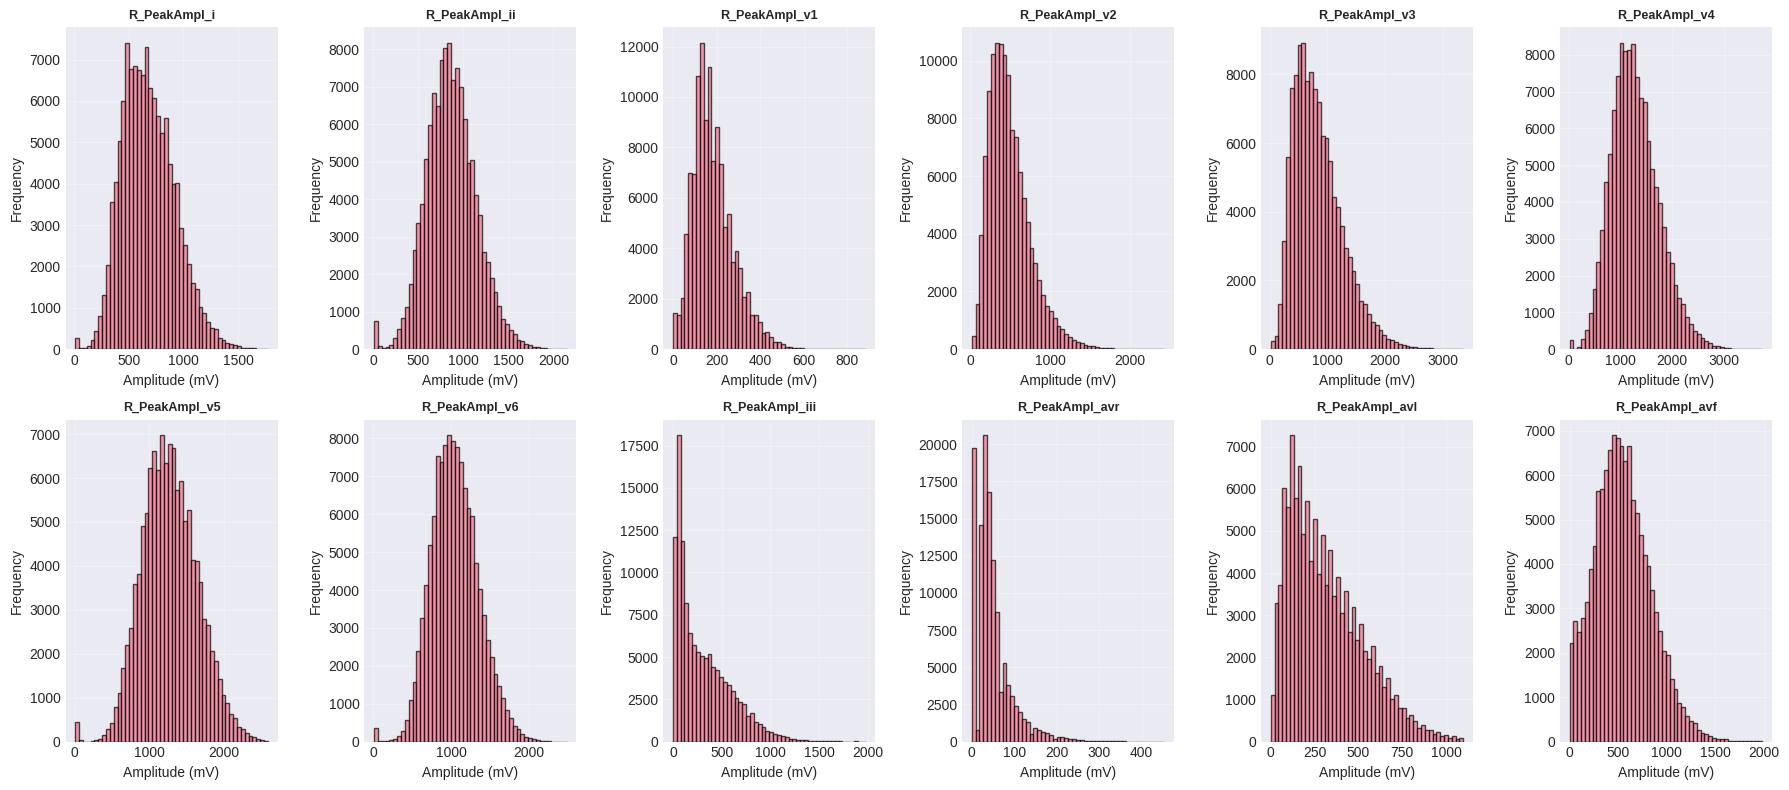

In [6]:
# Analyze R wave amplitudes across leads
print("=" * 80)
print("R WAVE AMPLITUDES ACROSS LEADS")
print("=" * 80)

r_ampl_columns = [col for col in df.columns if col.startswith('R_PeakAmpl_')]
if r_ampl_columns:
    print(f"\nFound {len(r_ampl_columns)} R wave amplitude columns")
    print("\nDescriptive statistics:")
    r_stats = df[r_ampl_columns].describe()
    print(r_stats)
    
    # Visualization
    fig, axes = plt.subplots(2, 6, figsize=(18, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(r_ampl_columns[:12]):
        if i < len(axes):
            df[col].hist(bins=50, ax=axes[i], edgecolor='black', alpha=0.7)
            axes[i].set_title(f'{col}', fontsize=9, fontweight='bold')
            axes[i].set_xlabel('Amplitude (mV)')
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


BINARY FLAGS (sl_*) ANALYSIS

Found 126 binary flag columns

Top 20 most frequently True flags:
sl_22      121977
sl_1684    121977
sl_251       7726
sl_1000       384
sl_21           0
sl_23           0
sl_33           0
sl_42           0
sl_43           0
sl_61           0
sl_62           0
sl_101          0
sl_24           0
sl_19           0
sl_104          0
sl_105          0
sl_107          0
sl_108          0
sl_141          0
sl_142          0
dtype: int64

Percentage of samples with each flag (top 20):
sl_22      100.000000
sl_1684    100.000000
sl_251       6.333981
sl_1000      0.314813
sl_21        0.000000
sl_23        0.000000
sl_33        0.000000
sl_42        0.000000
sl_43        0.000000
sl_61        0.000000
sl_62        0.000000
sl_101       0.000000
sl_24        0.000000
sl_19        0.000000
sl_104       0.000000
sl_105       0.000000
sl_107       0.000000
sl_108       0.000000
sl_141       0.000000
sl_142       0.000000
dtype: float64


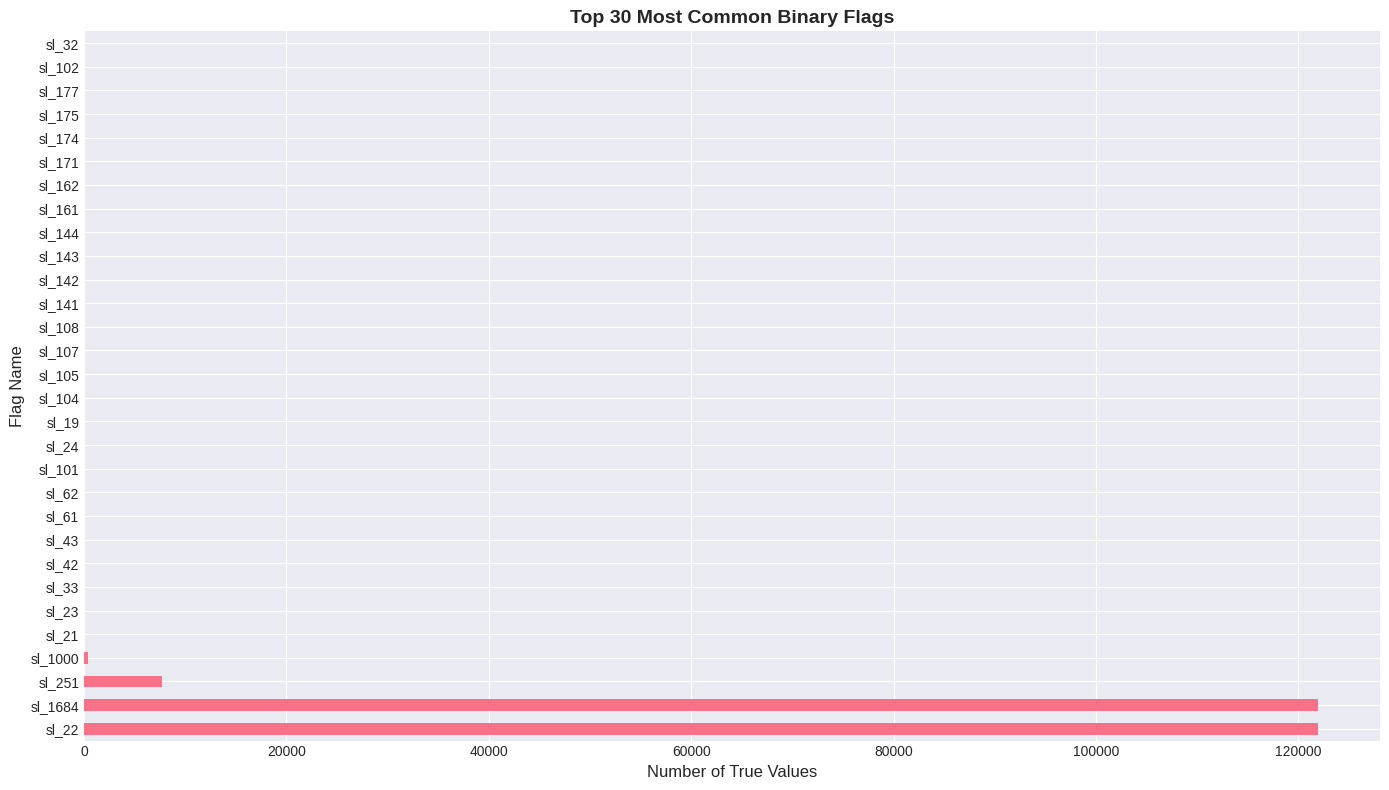

In [7]:
# Analyze binary flags (sl_* columns)
print("=" * 80)
print("BINARY FLAGS (sl_*) ANALYSIS")
print("=" * 80)

sl_columns = [col for col in df.columns if col.startswith('sl_')]
print(f"\nFound {len(sl_columns)} binary flag columns")

if sl_columns:
    # Count how many True values per column
    flag_counts = df[sl_columns].sum().sort_values(ascending=False)
    
    print(f"\nTop 20 most frequently True flags:")
    print(flag_counts.head(20))
    
    # Calculate percentage of True values
    flag_pct = (flag_counts / len(df)) * 100
    print(f"\nPercentage of samples with each flag (top 20):")
    print(flag_pct.head(20))
    
    # Visualization
    plt.figure(figsize=(14, 8))
    flag_counts.head(30).plot(kind='barh')
    plt.title('Top 30 Most Common Binary Flags', fontsize=14, fontweight='bold')
    plt.xlabel('Number of True Values', fontsize=12)
    plt.ylabel('Flag Name', fontsize=12)
    plt.tight_layout()
    plt.show()


CORRELATION ANALYSIS - KEY ECG PARAMETERS

Correlation matrix:
               VentRate  AtrialRate        pr       qrs        qt      qtcf  \
VentRate       1.000000    0.998665 -0.069266 -0.103854 -0.626705  0.037745   
AtrialRate     0.998665    1.000000 -0.069641 -0.103621 -0.626404  0.036959   
pr            -0.069266   -0.069641  1.000000 -0.088978 -0.027865 -0.095869   
qrs           -0.103854   -0.103621 -0.088978  1.000000  0.149337  0.104753   
qt            -0.626705   -0.626404 -0.027865  0.149337  1.000000  0.752397   
qtcf           0.037745    0.036959 -0.095869  0.104753  0.752397  1.000000   
avgrrinterval -0.990933   -0.989535  0.071925  0.103497  0.627323 -0.038667   

               avgrrinterval  
VentRate           -0.990933  
AtrialRate         -0.989535  
pr                  0.071925  
qrs                 0.103497  
qt                  0.627323  
qtcf               -0.038667  
avgrrinterval       1.000000  


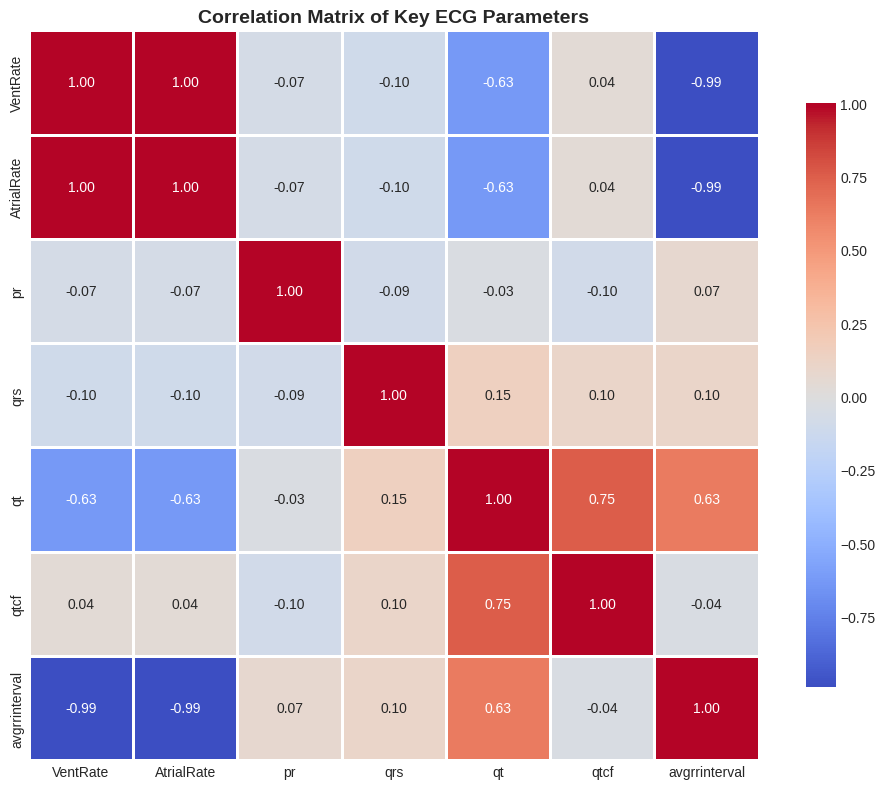

In [8]:
# Correlation analysis for key ECG parameters
print("=" * 80)
print("CORRELATION ANALYSIS - KEY ECG PARAMETERS")
print("=" * 80)

key_params = ['VentRate', 'AtrialRate', 'pr', 'qrs', 'qt', 'qtcf', 'avgrrinterval']
available_params = [p for p in key_params if p in df.columns]

if len(available_params) > 1:
    correlation_matrix = df[available_params].corr()
    
    print("\nCorrelation matrix:")
    print(correlation_matrix)
    
    # Visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Key ECG Parameters', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [9]:
# Data type analysis
print("=" * 80)
print("DATA TYPES SUMMARY")
print("=" * 80)

dtype_counts = df.dtypes.value_counts()
print("\nData type distribution:")
print(dtype_counts)

# Count numeric vs non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\nNumeric columns: {len(numeric_cols)}")
print(f"Non-numeric columns: {len(non_numeric_cols)}")

if non_numeric_cols:
    print(f"\nNon-numeric columns: {non_numeric_cols[:10]}")


DATA TYPES SUMMARY

Data type distribution:
float64    646
bool       126
int64       15
object       1
Name: count, dtype: int64

Numeric columns: 661
Non-numeric columns: 127

Non-numeric columns: ['sl_19', 'sl_21', 'sl_22', 'sl_23', 'sl_24', 'sl_32', 'sl_33', 'sl_42', 'sl_43', 'sl_61']


In [10]:
# Summary statistics for numeric columns
print("=" * 80)
print("OVERALL DATA QUALITY SUMMARY")
print("=" * 80)

print(f"\nDataset Dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

numeric_df = df.select_dtypes(include=[np.number])
print(f"\nNumeric columns: {len(numeric_df.columns)}")
print(f"Non-numeric columns: {len(df.columns) - len(numeric_df.columns)}")

# Check for infinite values
if len(numeric_df.columns) > 0:
    inf_counts = np.isinf(numeric_df).sum().sum()
    print(f"\nInfinite values: {inf_counts}")

# Summary of key statistics
print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
print(f"✓ Total ECG records: {len(df):,}")
print(f"✓ Total features: {len(df.columns)}")
print(f"✓ ECG category: {df['ecgcategory'].unique() if 'ecgcategory' in df.columns else 'N/A'}")
print(f"✓ Unique patients: {df['patid'].nunique() if 'patid' in df.columns else 'N/A'}")
print(f"✓ Unique test IDs: {df['TestID'].nunique() if 'TestID' in df.columns else 'N/A'}")


OVERALL DATA QUALITY SUMMARY

Dataset Dimensions: 121,977 rows × 788 columns

Memory usage: 637.58 MB

Numeric columns: 661
Non-numeric columns: 127

Infinite values: 0

SUMMARY
✓ Total ECG records: 121,977
✓ Total features: 788
✓ ECG category: ['Normal ECG']
✓ Unique patients: 121977
✓ Unique test IDs: 121977
